In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

import acquire
import prepare

# Titanic

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [49]:
titanic_train, titanic_validate, titanic_test = prepare.train_validate_test_split(prepare.prep_titanic(acquire.get_titanic_data()), 'survived')

What is your baseline prediction? 

In [50]:
#titanic_train.survived.value_counts()

In [51]:
#titanic_train['baseline_prediction'] = titanic_train.survived.value_counts().idxmax()

#baseline_accuracy = metrics.accuracy_score(y_true=titanic_train.survived, y_pred=titanic_train.baseline_prediction)

#print(f'Baseline accuracy: {baseline_accuracy:%}')

In [52]:
titanic_train.head()

,survived,sex,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
301,1,male,2,0,23.2500,Third,Queenstown,0,1,0,1,1,0
290,1,female,0,0,78.8500,First,Southampton,1,0,0,0,0,1
779,1,female,0,1,211.3375,First,Southampton,0,0,0,0,0,1
356,1,female,0,1,55.0000,First,Southampton,0,0,0,0,0,1
147,0,female,2,2,34.3750,Third,Southampton,0,0,0,1,0,1


What is your baseline accuracy? *remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.*

In [53]:
titanic_train.head()

,survived,sex,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
301,1,male,2,0,23.2500,Third,Queenstown,0,1,0,1,1,0
290,1,female,0,0,78.8500,First,Southampton,1,0,0,0,0,1
779,1,female,0,1,211.3375,First,Southampton,0,0,0,0,0,1
356,1,female,0,1,55.0000,First,Southampton,0,0,0,0,0,1
147,0,female,2,2,34.3750,Third,Southampton,0,0,0,1,0,1


In [54]:
#functions can't take strings so i dropped all columns that are strings
drop_columns = list(titanic_train.select_dtypes(include='object').columns)

titanic_train.drop(columns=drop_columns, inplace=True)

In [55]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=['survived'])
y_train = titanic_train.survived

In [56]:
#figure out the mode of values in our target variable
titanic_train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [57]:
#baseline is 0 so then see where y_train is equal to 0 and then the mean of that
baseline_acc = (y_train == 0).mean()

print(f'Baseline accuracy: {baseline_acc:.2%}')

Baseline accuracy: 61.65%


In [58]:
#create my tree with no depth constraints
tree = DecisionTreeClassifier(max_depth = 3) # my algorithm

#fit my tree
tree = tree.fit(X_train, y_train) #my model

In [59]:
#model score
tree.score(X_train, y_train)

0.8052208835341366

In [60]:
# make prediction on train obeservations
y_pred = tree.predict(X_train)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [61]:
#confusion matrix
metrics.confusion_matrix(y_train, y_pred)

array([[268,  39],
       [ 58, 133]])

In [62]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,268,39
1,58,133


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


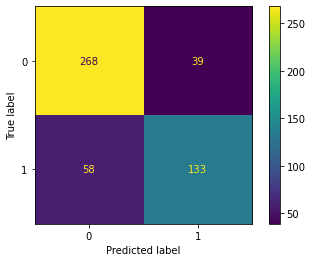

In [63]:
metrics.plot_confusion_matrix(tree, X_train, y_train, display_labels=[0, 1])

In [64]:
#classification report
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       307
           1       0.77      0.70      0.73       191

    accuracy                           0.81       498
   macro avg       0.80      0.78      0.79       498
weighted avg       0.80      0.81      0.80       498



In [65]:
tn = 297
tp = 170
fp = 10
fn = 21

tpr = recall = tp/ (tp + fn)
print(f'true positive rate: {tpr}')
fpr = fp / (fp + tn)
print(f'false positive rate: {fpr}')
tnr = tn / (tn + fp)
print(f'true negative rate: {tnr}')
fnr = fn / (fn + tp)
print(f'false negative rate: {fnr}')

true positive rate: 0.8900523560209425
false positive rate: 0.03257328990228013
true negative rate: 0.9674267100977199
false negative rate: 0.1099476439790576


### Compute: 
- Accuracy: 0.94
- precision: 0.94
- recall: 0.89
- f1-score:
- support:

In [66]:
drop_columns = list(titanic_validate.select_dtypes(include='object').columns)

titanic_validate.drop(columns=drop_columns, inplace=True)

In [67]:
X_validate = titanic_validate.drop(columns=['survived'])
y_validate = titanic_validate.survived

In [68]:
val_pred = tree.predict(X_validate)

In [69]:
#model accuracy score
tree.score(X_validate, y_validate)

0.822429906542056

In [70]:
#confusion matrix
metrics.confusion_matrix(y_validate, val_pred)

array([[123,   9],
       [ 29,  53]])

In [71]:
print(metrics.classification_report(y_validate, val_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       132
           1       0.85      0.65      0.74        82

    accuracy                           0.82       214
   macro avg       0.83      0.79      0.80       214
weighted avg       0.83      0.82      0.82       214



## New

Run through steps 2-4 using a different max_depth value.

In [ ]:
clf = DecisionTreeClassifier(max_depth = 6)

clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
#model score
clf.score(X_train, y_train)

In [ ]:
#confusion matrix
metrics.confusion_matrix(y_train, y_pred)

In [ ]:
#classification report
print(metrics.classification_report(y_train, y_pred))

In [ ]:
tn = 285
tp = 144
fp = 22
fn = 47

tpr = recall = tp/ (tp + fn)
print(f'true positive rate: {tpr}')
fpr = fp / (fp + tn)
print(f'false positive rate: {fpr}')
tnr = tn / (tn + fp)
print(f'true negative rate: {tnr}')
fnr = fn / (fn + tp)
print(f'false negative rate: {fnr}')

###### Compute: 
- Accuracy: 0.86
- precision: 0.86
- recall: 0.93
- f1-score:
- support:

Which model performs better on your in-sample data?

Which model performs best on your out-of-sample data, the validate set?

## Telco

In [ ]:
telco_train, telco_validate, telco_test = prepare.train_validate_test_split(prepare.prep_telco(acquire.get_telco_data()), 'churn')

In [ ]:
telco_train.churn_Yes.value_counts()

In [ ]:
telco_train['baseline_prediction'] = telco_train.churn_Yes.value_counts().idxmax()

In [ ]:
telco_train.head()

In [ ]:
drop_columns = list(telco_train.select_dtypes(include='object').columns)

telco_train.drop(columns=drop_columns, inplace=True)

In [ ]:
telco_train.info()

In [ ]:
X_train = telco_train.drop(columns=['churn_Yes'])
y_train = telco_train.churn_Yes

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
#model score
clf.score(X_train, y_train)

In [ ]:
#confusion matrix
metrics.confusion_matrix(y_train, y_pred)

In [ ]:
#classification report
print(metrics.classification_report(y_train, y_pred))

In [ ]:
tn = 2891
fn = 7
fp = 0
tp = 1039



tpr = recall = tp/ (tp + fn)
print(f'true positive rate: {tpr}')
fpr = fp / (fp + tn)
print(f'false positive rate: {fpr}')
tnr = tn / (tn + fp)
print(f'true negative rate: {tnr}')
fnr = fn / (fn + tp)
print(f'false negative rate: {fnr}')

In [ ]:
clf = DecisionTreeClassifier(max_depth = 3)

clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
#model score
clf.score(X_train, y_train)

In [ ]:
#confusion matrix
metrics.confusion_matrix(y_train, y_pred)

In [ ]:
#classification report
print(metrics.classification_report(y_train, y_pred))